# Импорт

In [51]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [52]:
field_size = 6

In [53]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 - 100 * np.eye(field_size)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 - 100 * np.eye(field_size)

In [54]:
print(feromon_map)

[[-9.97066196e+01  5.77393929e-01  5.17548857e-01  5.23836198e-01
   5.60419147e-01  6.54530739e-01]
 [ 5.77393929e-01 -9.98017645e+01  7.59724894e-01  4.84623171e-01
   3.01891514e-01  9.91332666e-02]
 [ 5.17548857e-01  7.59724894e-01 -9.90773801e+01  2.17382902e-01
   3.67598714e-01  4.08186497e-01]
 [ 5.23836198e-01  4.84623171e-01  2.17382902e-01 -9.92144267e+01
   4.30558076e-01  4.02139496e-01]
 [ 5.60419147e-01  3.01891514e-01  3.67598714e-01  4.30558076e-01
  -9.91914615e+01  5.17382243e-01]
 [ 6.54530739e-01  9.91332666e-02  4.08186497e-01  4.02139496e-01
   5.17382243e-01 -9.97993704e+01]]


In [55]:
print(distance_map)

[[-9.94633319e+01  3.82329400e-01  5.51592475e-01  5.14067316e-01
   5.80012983e-01  8.04766938e-01]
 [ 3.82329400e-01 -9.94472928e+01  3.52801235e-01  8.60020550e-01
   6.32743836e-01  6.60871576e-01]
 [ 5.51592475e-01  3.52801235e-01 -9.98167655e+01  5.42109778e-01
   4.22614792e-01  4.67155660e-01]
 [ 5.14067316e-01  8.60020550e-01  5.42109778e-01 -9.97951481e+01
   2.44291237e-02  5.43970748e-01]
 [ 5.80012983e-01  6.32743836e-01  4.22614792e-01  2.44291237e-02
  -9.93359026e+01  3.85340571e-01]
 [ 8.04766938e-01  6.60871576e-01  4.67155660e-01  5.43970748e-01
   3.85340571e-01 -9.93349129e+01]]


In [56]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


In [57]:
def random_experement(ant: Ant, 
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=[np.random.randint(0, field_size), 
                              np.random.randint(0, field_size)], 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [58]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=pos, 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [59]:
ants = [Ant(walk_distance=field_size+1, a=1, b=i) for i in range(1, 5)] + [Ant(walk_distance=field_size+1, a=i, b=1) for i in range(2, 5)]
feromon_map_updater = TrackOfWalk(feromon_volume=field_size*2, feromon_erosion_speed=0.7)


# Опыт со случайной расстановкой

Сравнение результатов при разных гиппер-параметрах у муравья.

In [60]:
results = list()
for ant in ants:
    results.append(random_experement(ant=ant, 
                                     feromon_map_updater=feromon_map_updater, 
                                     feromon_map=feromon_map, 
                                     distance_map=distance_map, 
                                     num_of_iteration=40))

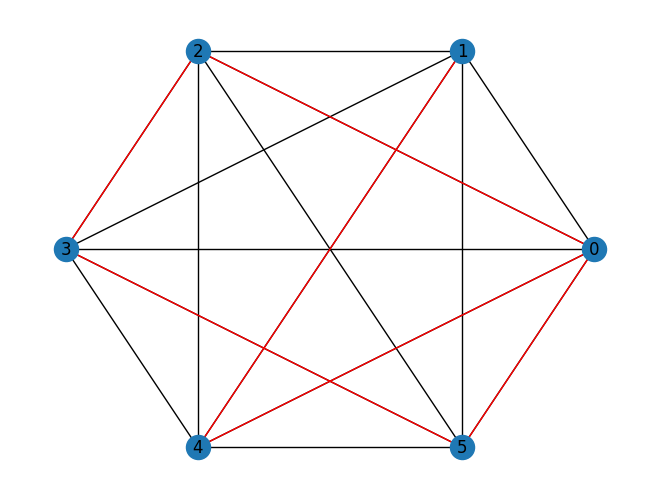

In [61]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G1 = nx.Graph()

for start, end, length in edges:
    G1.add_edge(start, end, length=length)


nx.draw_circular(G1, with_labels = True)
nx.draw_networkx_edges(G1, nx.circular_layout(G1), edgelist=edges_res, edge_color='r', arrows=True)


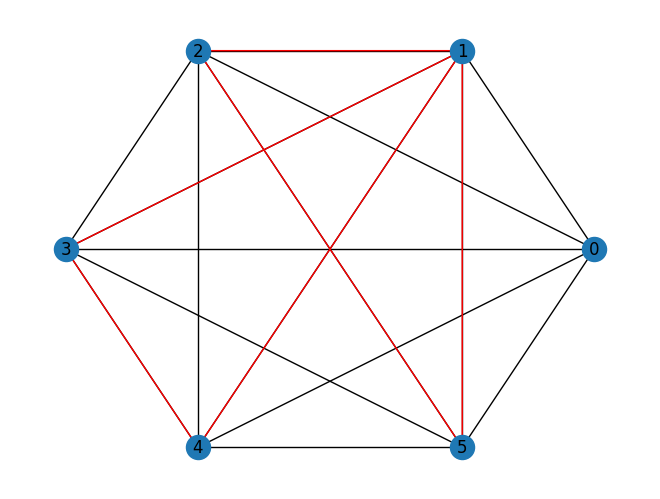

In [62]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G2 = nx.Graph()

for start, end, length in edges:
    G2.add_edge(start, end, length=length)


nx.draw_circular(G2, with_labels = True)
nx.draw_networkx_edges(G2, nx.circular_layout(G2), edgelist=edges_res, edge_color='r', arrows=True)


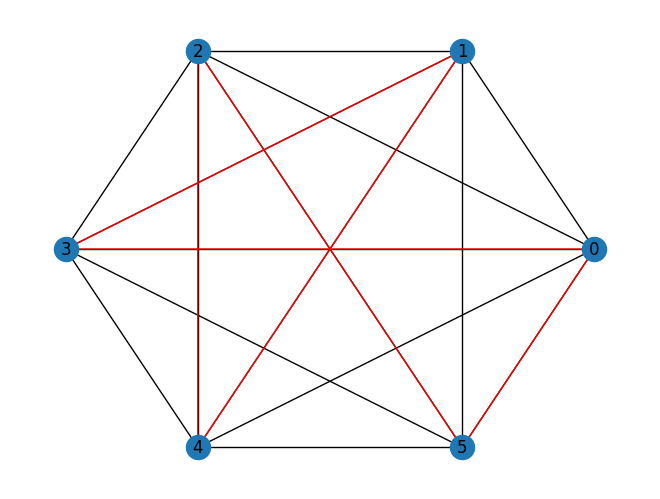

In [63]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G3 = nx.Graph()

for start, end, length in edges:
    G3.add_edge(start, end, length=length)


nx.draw_circular(G3, with_labels = True)
nx.draw_networkx_edges(G3, nx.circular_layout(G3), edgelist=edges_res, edge_color='r', arrows=True)


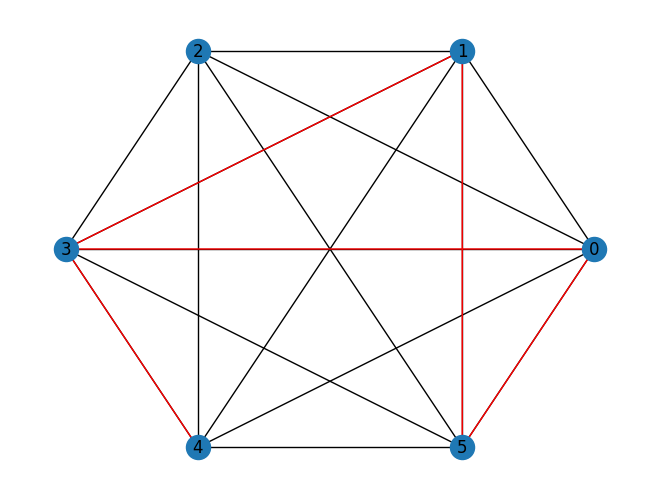

In [64]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G4 = nx.Graph()

for start, end, length in edges:
    G4.add_edge(start, end, length=length)


nx.draw_circular(G4, with_labels = True)
nx.draw_networkx_edges(G4, nx.circular_layout(G4), edgelist=edges_res, edge_color='r', arrows=True)


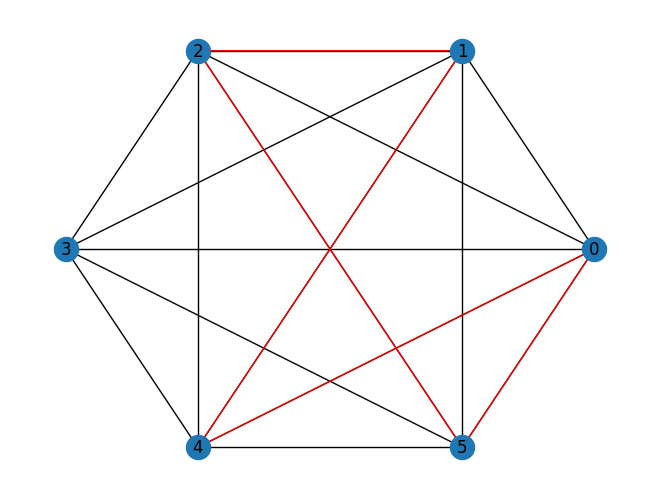

In [65]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G5 = nx.Graph()

for start, end, length in edges:
    G5.add_edge(start, end, length=length)


nx.draw_circular(G5, with_labels = True)
nx.draw_networkx_edges(G5, nx.circular_layout(G5), edgelist=edges_res, edge_color='r', arrows=True)


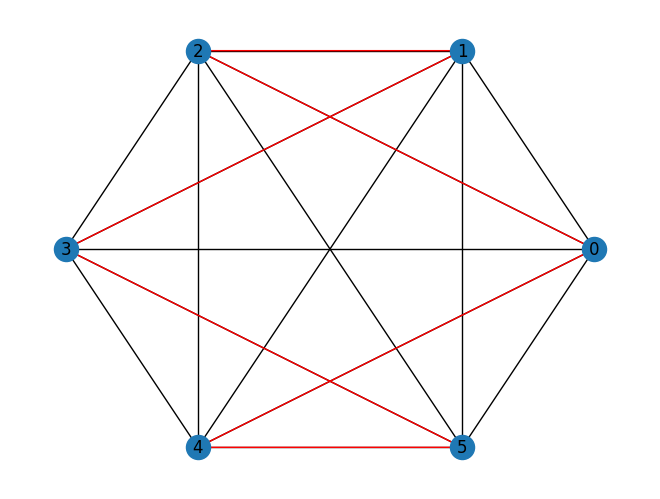

In [66]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G6 = nx.Graph()

for start, end, length in edges:
    G6.add_edge(start, end, length=length)


nx.draw_circular(G6, with_labels = True)
nx.draw_networkx_edges(G6, nx.circular_layout(G6), edgelist=edges_res, edge_color='r', arrows=True)


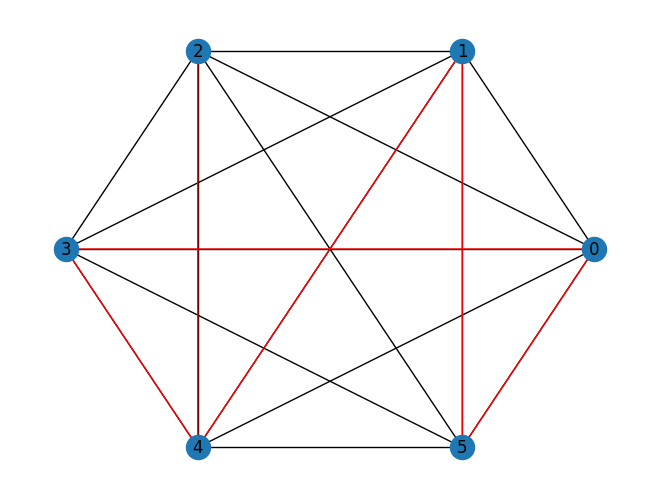

In [67]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G7 = nx.Graph()

for start, end, length in edges:
    G7.add_edge(start, end, length=length)


nx.draw_circular(G7, with_labels = True)
nx.draw_networkx_edges(G7, nx.circular_layout(G7), edgelist=edges_res, edge_color='r', arrows=True)


# Опыт с фиксированной расстановкой

Сравнение результатов при разных гиппер-параметрах у муравья.

In [68]:
results = list()
for ant in ants:
    results.append(experement(ant=ant, 
                              pos=[0, 0], 
                              feromon_map_updater=feromon_map_updater,
                              feromon_map=feromon_map, 
                              distance_map=distance_map, 
                              num_of_iteration=20))

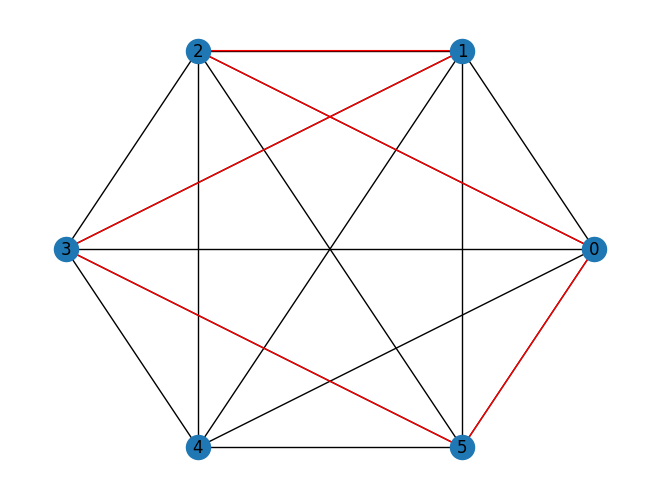

In [69]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F1 = nx.Graph()

for start, end, length in edges:
    F1.add_edge(start, end, length=length)


nx.draw_circular(F1, with_labels = True)
nx.draw_networkx_edges(F1, nx.circular_layout(F1), edgelist=edges_res, edge_color='r', arrows=True)


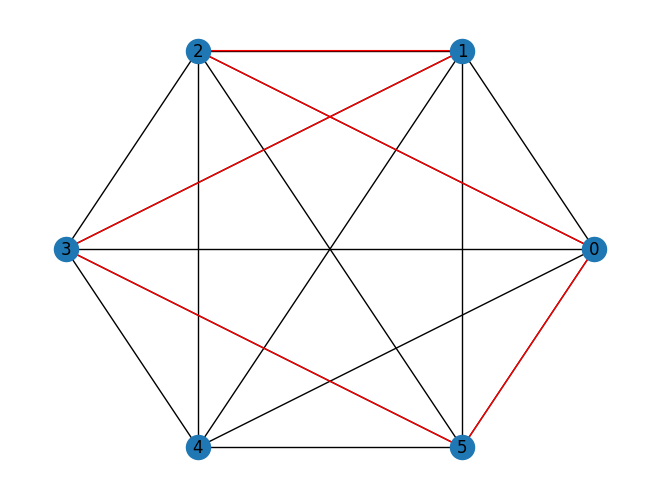

In [70]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F2 = nx.Graph()

for start, end, length in edges:
    F2.add_edge(start, end, length=length)


nx.draw_circular(F2, with_labels = True)
nx.draw_networkx_edges(F2, nx.circular_layout(F2), edgelist=edges_res, edge_color='r', arrows=True)


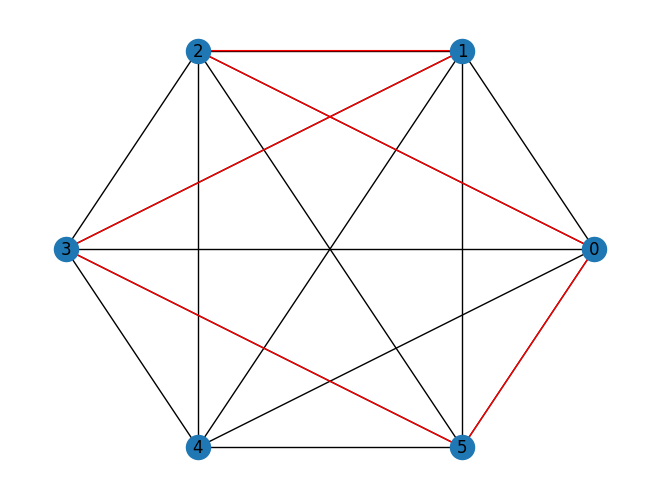

In [71]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F3 = nx.Graph()

for start, end, length in edges:
    F3.add_edge(start, end, length=length)


nx.draw_circular(F3, with_labels = True)
nx.draw_networkx_edges(F3, nx.circular_layout(F3), edgelist=edges_res, edge_color='r', arrows=True)


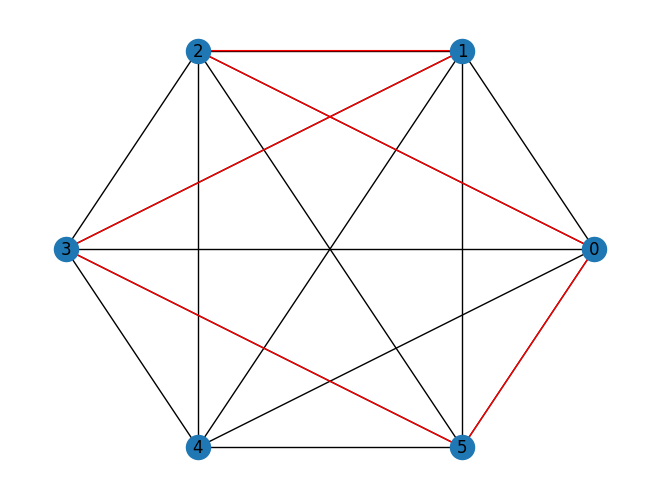

In [72]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F4 = nx.Graph()

for start, end, length in edges:
    F4.add_edge(start, end, length=length)


nx.draw_circular(F4, with_labels = True)
nx.draw_networkx_edges(F4, nx.circular_layout(F4), edgelist=edges_res, edge_color='r', arrows=True)


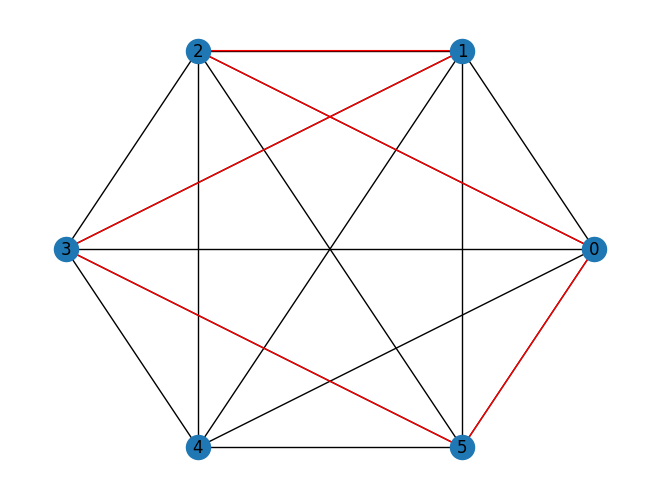

In [73]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F5 = nx.Graph()

for start, end, length in edges:
    F5.add_edge(start, end, length=length)


nx.draw_circular(F5, with_labels = True)
nx.draw_networkx_edges(F5, nx.circular_layout(F5), edgelist=edges_res, edge_color='r', arrows=True)


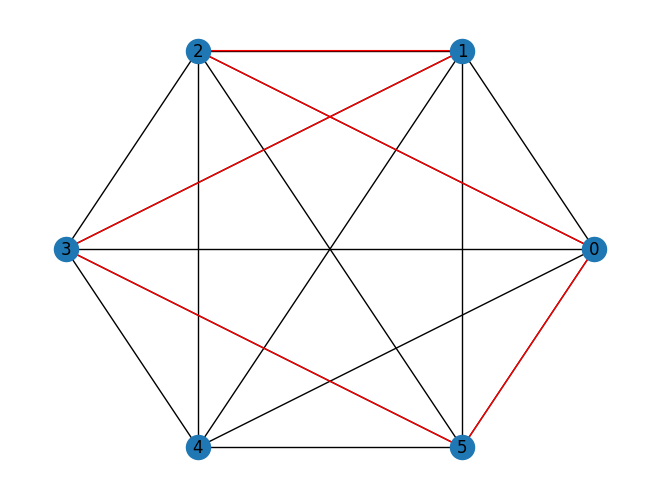

In [74]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F6 = nx.Graph()

for start, end, length in edges:
    F6.add_edge(start, end, length=length)


nx.draw_circular(F6, with_labels = True)
nx.draw_networkx_edges(F6, nx.circular_layout(F6), edgelist=edges_res, edge_color='r', arrows=True)


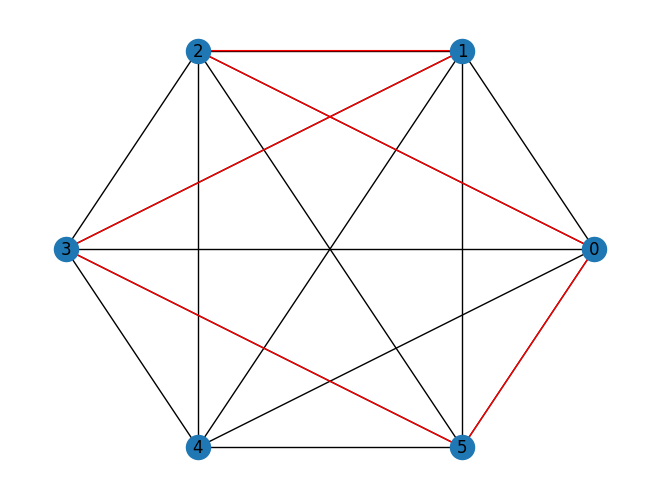

In [75]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F7 = nx.Graph()

for start, end, length in edges:
    F7.add_edge(start, end, length=length)


nx.draw_circular(F7, with_labels = True)
nx.draw_networkx_edges(F7, nx.circular_layout(F7), edgelist=edges_res, edge_color='r', arrows=True)
